In [ ]:
# RUN TFLITE INFERENCE ON AN EXAMPLE DATASET

In [1]:
!pip install tflite-runtime

ERROR: Could not find a version that satisfies the requirement tflite-runtime (from versions: none)
ERROR: No matching distribution found for tflite-runtime


In [2]:
!pip3 install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
                                              0.0/867.1 kB ? eta -:--:--
     ----------                             235.5/867.1 kB 4.8 MB/s eta 0:00:01
     ------------------------               553.0/867.1 kB 5.8 MB/s eta 0:00:01
     -------------------------------------- 867.1/867.1 kB 6.9 MB/s eta 0:00:00


In [5]:
!pip install tensorflow

                                              0.0/284.1 MB ? eta -:--:--
                                              0.2/284.1 MB 4.1 MB/s eta 0:01:09
                                              0.9/284.1 MB 8.5 MB/s eta 0:00:34
                                              1.7/284.1 MB 9.8 MB/s eta 0:00:29
                                             2.3/284.1 MB 10.4 MB/s eta 0:00:28
                                             2.9/284.1 MB 10.8 MB/s eta 0:00:27
                                             3.3/284.1 MB 10.6 MB/s eta 0:00:27
                                             3.9/284.1 MB 10.8 MB/s eta 0:00:27
                                             4.5/284.1 MB 11.0 MB/s eta 0:00:26
                                             5.0/284.1 MB 11.0 MB/s eta 0:00:26
                                             5.5/284.1 MB 11.0 MB/s eta 0:00:26
                                             6.0/284.1 MB 11.0 MB/s eta 0:00:26
                                             6.

In [14]:
import pandas as pd
import numpy as np


ROWS_PER_FRAME = 543 #no of landmarks per frame

def load_relevant_data_subset(pq_file):
    data_columns = ['x','y','z']
    data = pd.read_parquet(pq_file, columns = data_columns)
    n_frames = int(len(data) /ROWS_PER_FRAME)
    print(len(data))
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    print(n_frames)
    return data.astype(np.float32)

In [15]:
#load in tflite model
import tensorflow as tf
# import tflite_runtime.interpreter as tflite

interpreter = tf.lite.Interpreter(model_path="./model.tflite")
interpreter.allocate_tensors()
# interpreter = tflite.Interpreter("./model.tflite")
found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")

# output = prediction_fn(inputs=demo_raw_data)
# sign = output['outputs'].argmax()

In [16]:
train = pd.read_csv('../train_new_csv.csv')
train['sign_ord'] = train['sign'].astype('category').cat.codes
# print(train['sign_ord'])
#dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()

pq_file = './output.parquet'
xyz_np = load_relevant_data_subset(pq_file)
prediction = prediction_fn(inputs = xyz_np)
sign = prediction['outputs'].argmax() 
print(prediction['outputs'])
# print(sign)



50499
93
[0.00269202 0.00076138 0.00277941 0.00312107 0.00245486 0.00128995
 0.0020422  0.00269661 0.00515676 0.0024475  0.00291039 0.00150778
 0.00280271 0.00346497 0.00251223 0.00085624 0.00105303 0.00147579
 0.00315204 0.00078486 0.00110402 0.00177905 0.00230135 0.0018801
 0.00273252 0.0038527  0.00367305 0.00086543 0.00337484 0.00288491
 0.00163157 0.00212814 0.00244344 0.00156528 0.00167926 0.00132415
 0.00271538 0.0027155  0.00336044 0.00164896 0.00134406 0.0016579
 0.00099449 0.00293586 0.00135099 0.00086934 0.00137606 0.00204571
 0.00139087 0.0030574  0.00393784 0.00205105 0.00207575 0.00341252
 0.00280495 0.00277565 0.00261674 0.00316291 0.00313167 0.0013829
 0.00245951 0.00150597 0.00427937 0.00168588 0.00271527 0.00197858
 0.00161871 0.00341661 0.00448681 0.00138824 0.00270045 0.00182604
 0.00326582 0.00068245 0.0008644  0.00506906 0.00118356 0.00216265
 0.00402571 0.00160011 0.00643619 0.00280221 0.00481611 0.00129723
 0.00193549 0.00137378 0.00239801 0.00381538 0.00203671 

In [17]:
train['sign_ord'].max()

1

In [18]:
print(ORD2SIGN)

{1: 'thankyou', 0: 'hello'}


In [19]:
#this is a workaround for serialized signs in original dataset
if (sign==113):
    sign = 0
elif(sign==214):
    sign = 1

In [20]:
ORD2SIGN[sign]

'hello'

In [21]:
prediction

{'outputs': array([0.00269202, 0.00076138, 0.00277941, 0.00312107, 0.00245486,
        0.00128995, 0.0020422 , 0.00269661, 0.00515676, 0.0024475 ,
        0.00291039, 0.00150778, 0.00280271, 0.00346497, 0.00251223,
        0.00085624, 0.00105303, 0.00147579, 0.00315204, 0.00078486,
        0.00110402, 0.00177905, 0.00230135, 0.0018801 , 0.00273252,
        0.0038527 , 0.00367305, 0.00086543, 0.00337484, 0.00288491,
        0.00163157, 0.00212814, 0.00244344, 0.00156528, 0.00167926,
        0.00132415, 0.00271538, 0.0027155 , 0.00336044, 0.00164896,
        0.00134406, 0.0016579 , 0.00099449, 0.00293586, 0.00135099,
        0.00086934, 0.00137606, 0.00204571, 0.00139087, 0.0030574 ,
        0.00393784, 0.00205105, 0.00207575, 0.00341252, 0.00280495,
        0.00277565, 0.00261674, 0.00316291, 0.00313167, 0.0013829 ,
        0.00245951, 0.00150597, 0.00427937, 0.00168588, 0.00271527,
        0.00197858, 0.00161871, 0.00341661, 0.00448681, 0.00138824,
        0.00270045, 0.00182604, 0.003

In [22]:
prediction['outputs'].shape

(250,)

<Axes: >

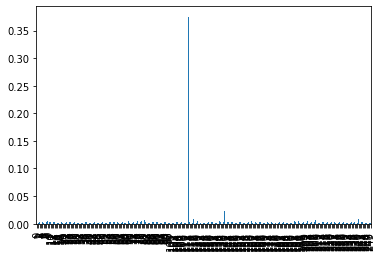

In [24]:
pd.Series(prediction['outputs']).plot(kind='bar')